## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv("./Mall_Customers.csv")
customer_set = customer_set.rename(index=str, columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})

**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
print("-"*40 + "\n")

print("Атрибути вибірки:")
display(customer_set.head(0))

print("-"*40 + "\n")

print(f"Розмірність датасету: {customer_set.shape}")

print("\n" + "-"*40 + "\n")

print("Статистична інформація:")
display(customer_set.describe())

print("-"*40 + "\n")

print("Типи даних:\n")
display(customer_set.info())

print("-"*40 + "\n")

print("Перевірка на наявність пропусків:")
display(customer_set.isnull().sum())

print("-"*40)


----------------------------------------

Атрибути вибірки:


,CustomerID,Gender,Age,Income,SpendingScore


----------------------------------------

Розмірність датасету: (200, 5)

----------------------------------------

Статистична інформація:


,CustomerID,Age,Income,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


----------------------------------------

Типи даних:

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


None

----------------------------------------

Перевірка на наявність пропусків:


CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

----------------------------------------


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [4]:
customer_set = customer_set.drop("CustomerID", axis="columns")

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

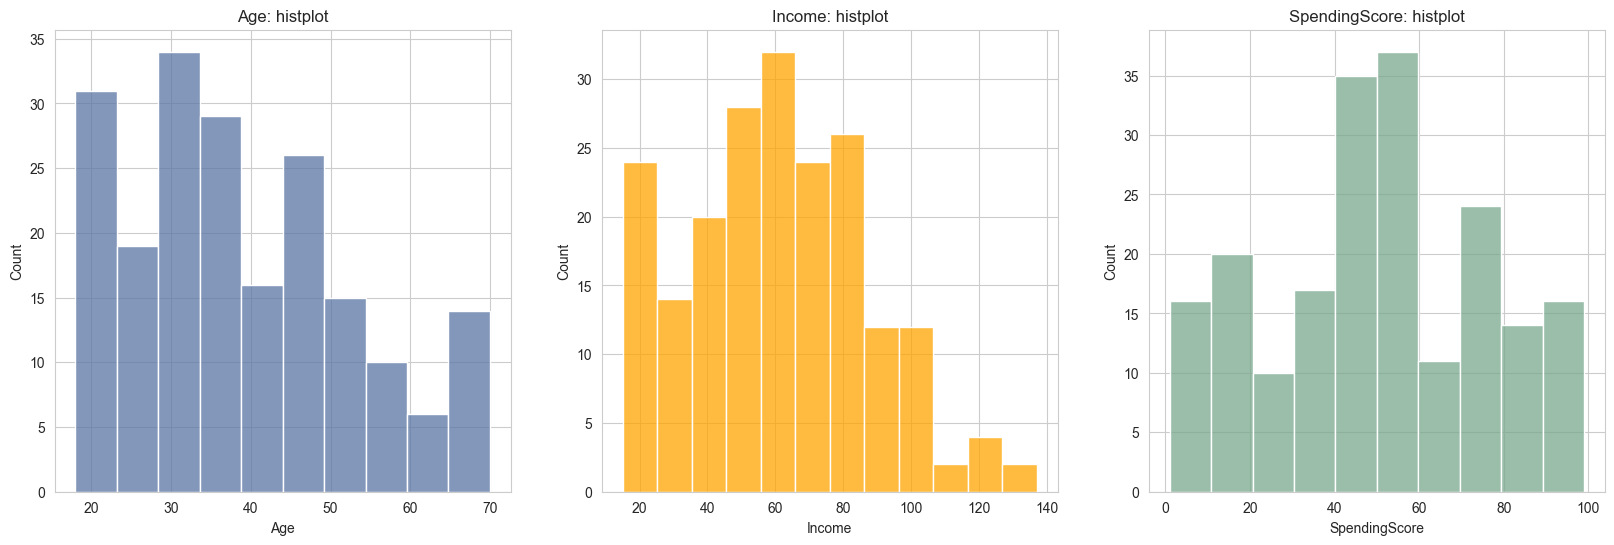

In [102]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(data=customer_set, x="Age", ax=ax1, color="#5975A4", bins=10)
ax1.set_title("Age: histplot")

sns.histplot(data=customer_set, x="Income", ax=ax2, color="orange", bins=12)
ax2.set_title("Income: histplot")

sns.histplot(data=customer_set, x="SpendingScore", ax=ax3, color="#7AA88F", bins=10)
ax3.set_title("SpendingScore: histplot")

plt.show()

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

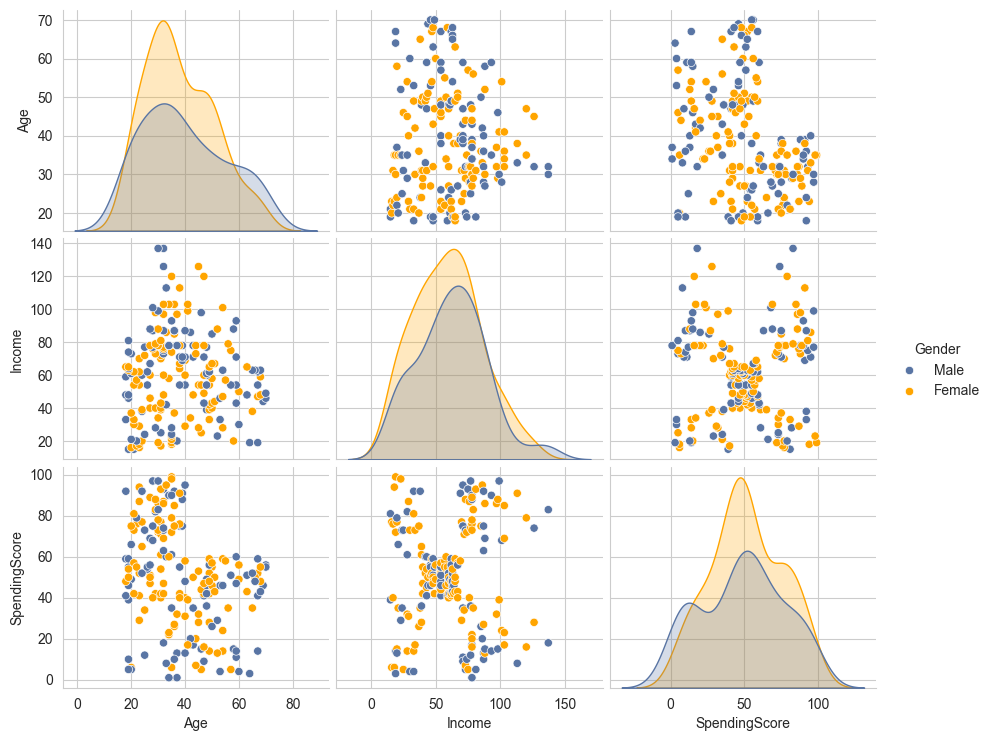

In [6]:
customer_pairplot = sns.pairplot(customer_set, hue="Gender", palette=["#5975A4", "orange"], aspect=1.2)
plt.show()

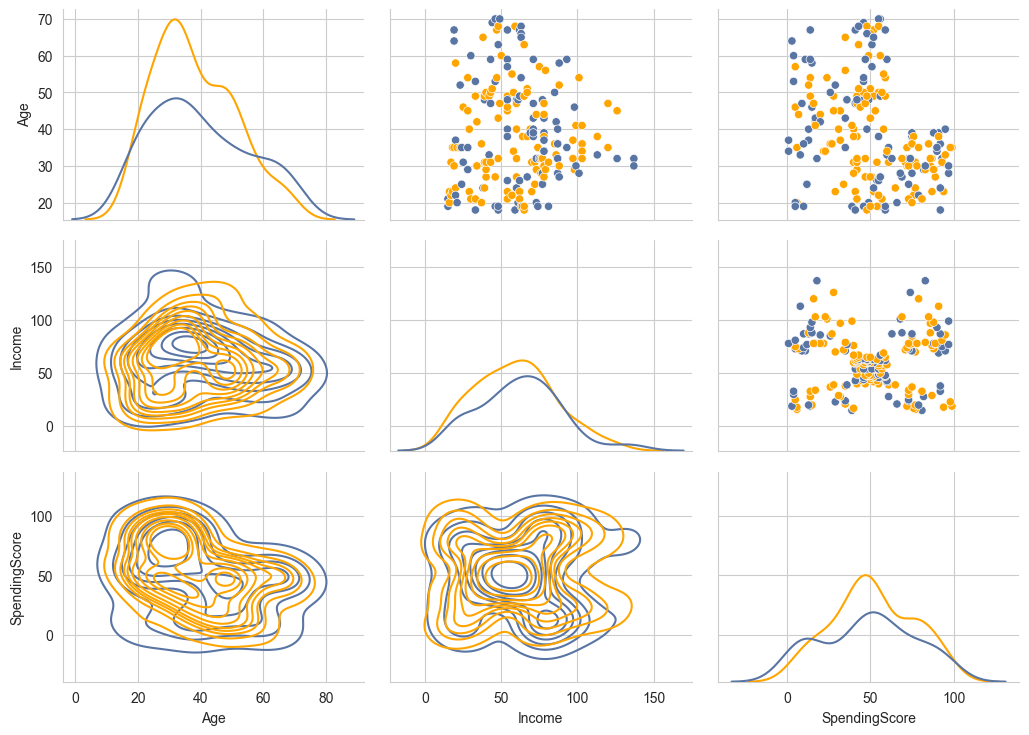

In [7]:
customer_pairgrid = sns.PairGrid(customer_set, hue="Gender", palette=["#5975A4", "orange"], aspect=1.4)
customer_pairgrid.map_upper(sns.scatterplot)
customer_pairgrid.map_diag(sns.kdeplot)
customer_pairgrid.map_lower(sns.kdeplot, lw=1)

plt.show()

**Висновки з 1-4 завдання (детальні)**

1. Датасет містить 4 атрибути: `Gender`, `Age`, `Income` та `Spending Score`. 
2. Пропуски відсутні, тож заповнювати додатково нічого не потрібно.
3.  Діаграми розподілу змінних:
    - `Age`: найбільше людей віком в 18-25 років та 30-35 років, найменше - від 60 до 65.
    - `Income`: найбільше людей з річним заробітком в 50-70 тис., найменше - в 110-120 тис.
    - `Spending Score`: найбільше людей з показником витрат в 40-60, найменше - в 20-30 та 60-70.
    
    Графіки даних змінних є мультимодальними.
4. Групуючим є атрибут `Gender`,  розподіли жінок та чоловіків є схожими на кожній з пар залежностей. 
5. Якщо подивитись на пару атрибутів `Spending Score` та `Income`, то можна побачити розділення на 5 груп.
6. По kde графіках також можна помітити формування 3 груп на парі атрибутів `Spending Score` та `Age` і `Income` та `Age`.

Отже, в кластеризації можна використати кластерування на 3 та 5 класів.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

----------------------------------------


Gender
Female    56.0
Male      44.0
Name: count, dtype: float64

----------------------------------------

Співвідношення жінок до чоловіків:
1.272727272727273

----------------------------------------


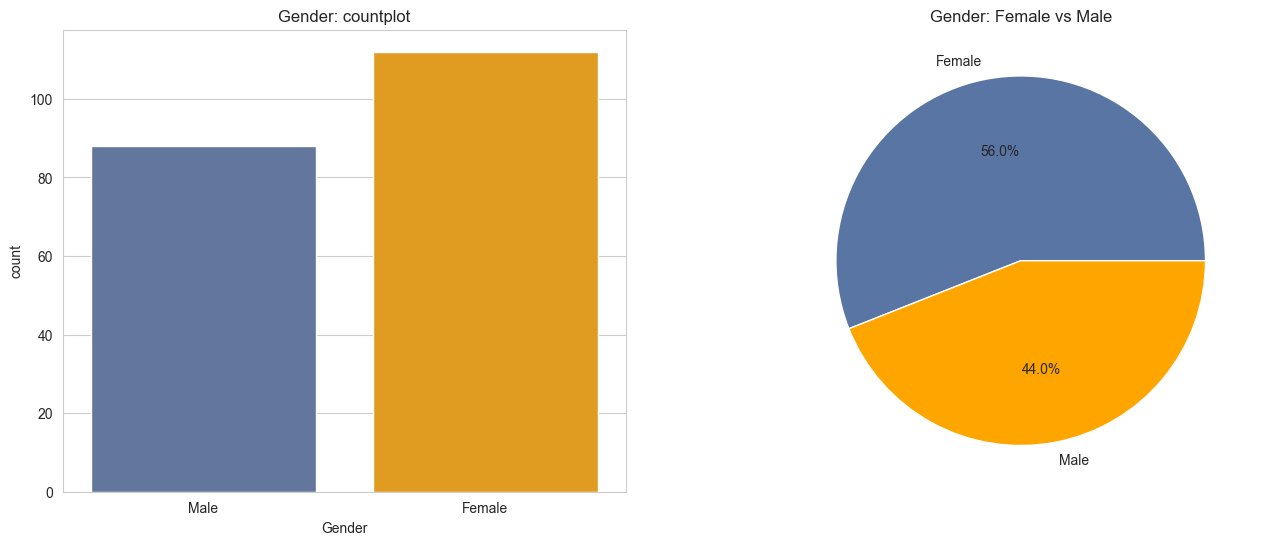

In [8]:
fig, ((ax1, ax2)) = plt.subplots(1,2, figsize=(16, 6))

gender_stats = (customer_set["Gender"].value_counts() / customer_set["Gender"].value_counts().sum()) * 100
gender_ratio = gender_stats["Female"] / gender_stats["Male"]

print('-'*40)

display(gender_stats)

print('-'*40 + '\n')

print("Співвідношення жінок до чоловіків:")
print(gender_ratio)

print('\n' + '-'*40)

sns.countplot(customer_set, x="Gender", palette=['#5975A4', 'orange'], ax=ax1)
ax1.set_title("Gender: countplot")

ax2.pie(gender_stats, labels=["Female", "Male"], autopct='%1.1f%%', colors=['#5975A4', 'orange'])
ax2.set_title("Gender: Female vs Male")

plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

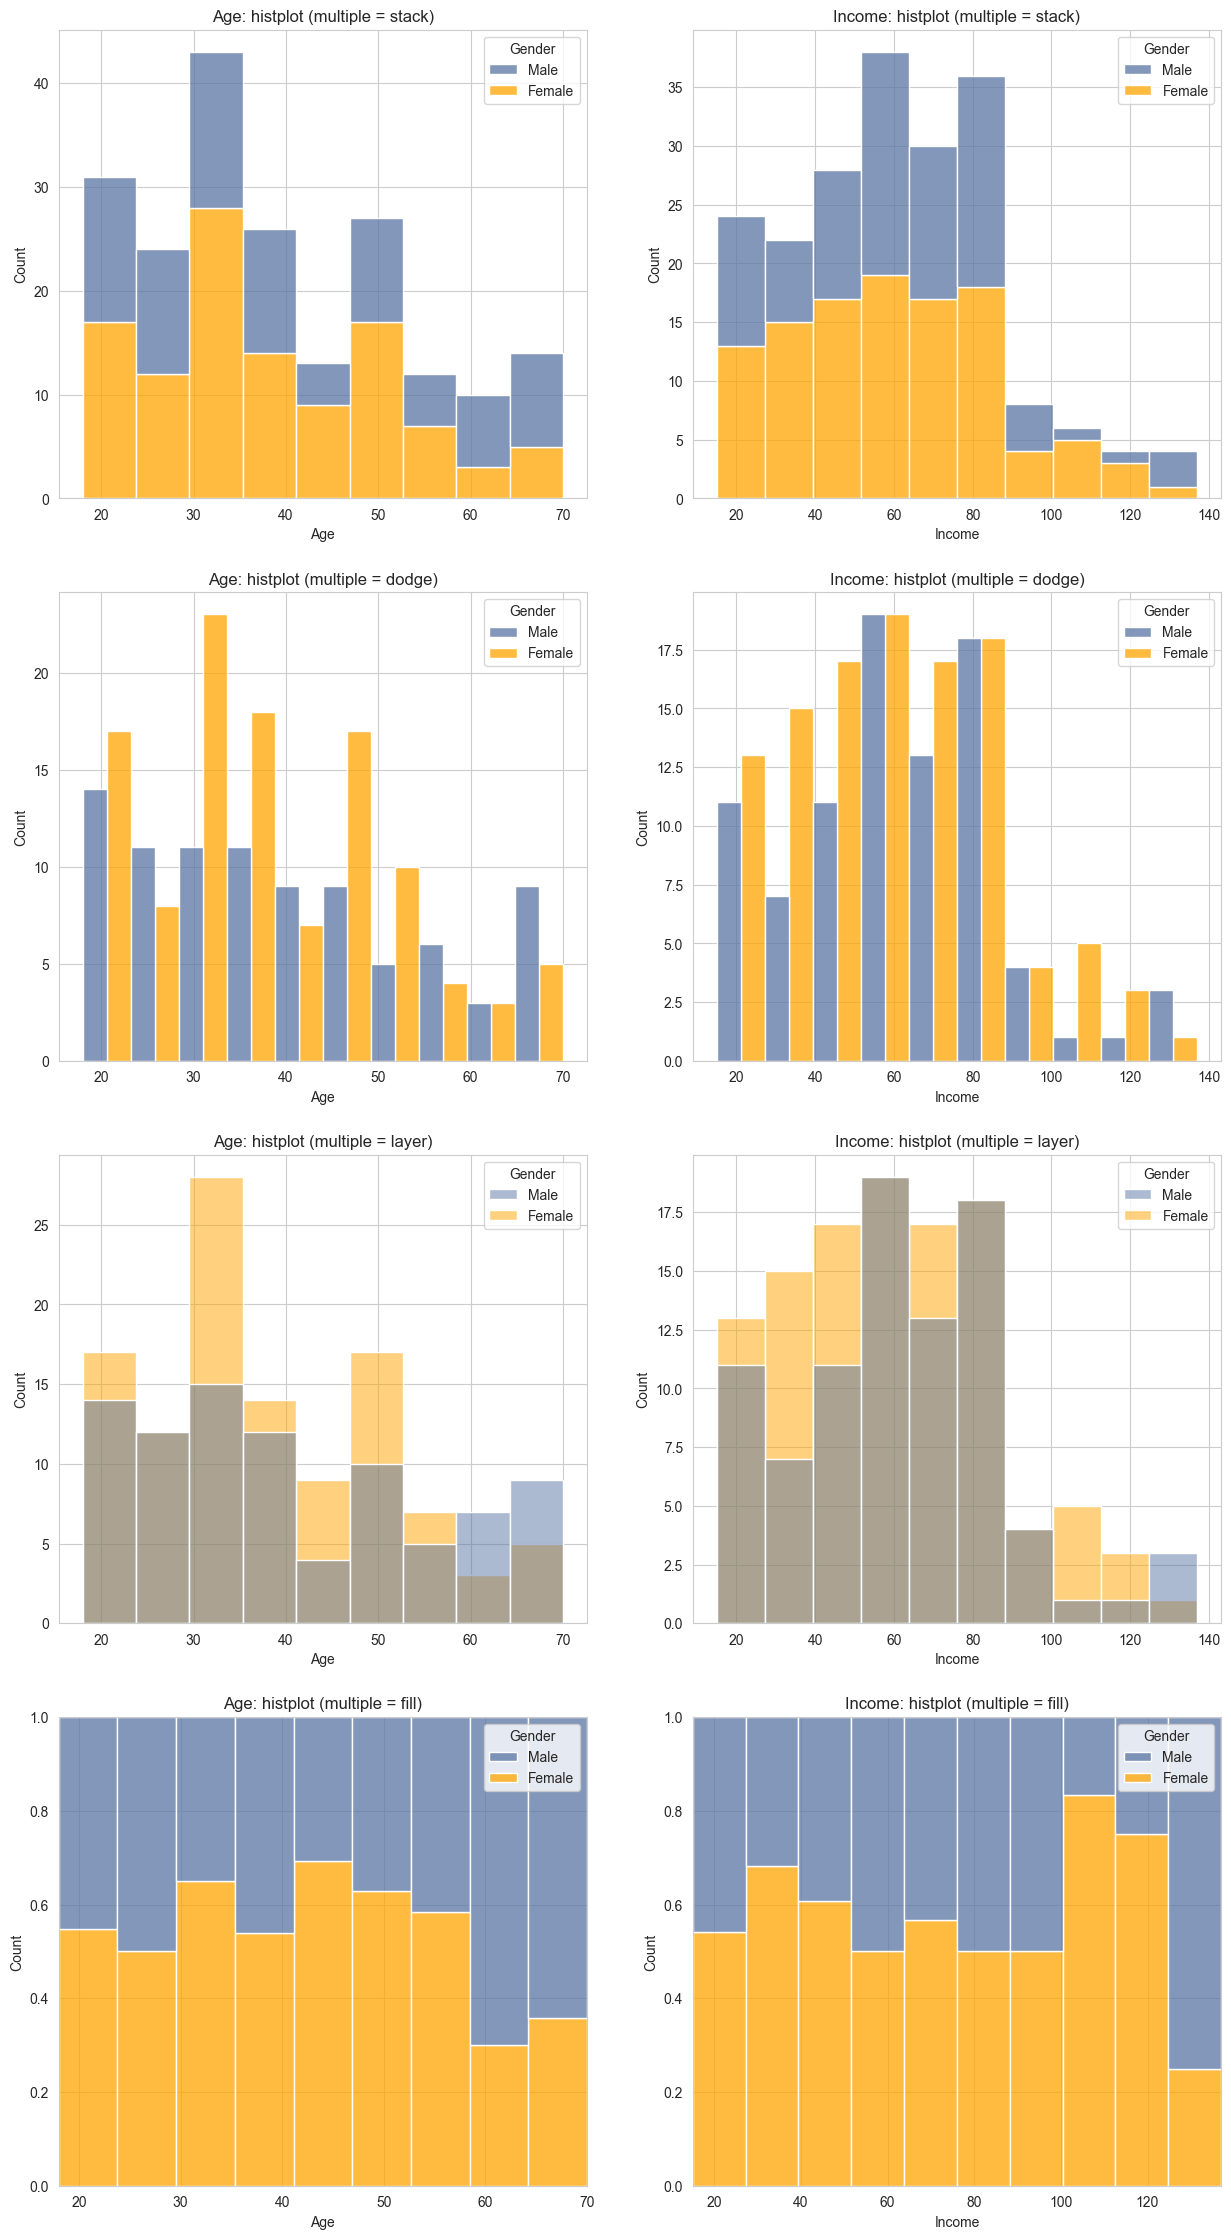

In [88]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(15, 28))

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax1, palette=['#5975A4', 'orange'], multiple="stack")
ax1.set_title("Age: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax2, palette=['#5975A4', 'orange'], multiple="stack")
ax2.set_title("Income: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax3, palette=['#5975A4', 'orange'], multiple="dodge", bins=10)
ax3.set_title("Age: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax4, palette=['#5975A4', 'orange'], multiple="dodge", bins=10)
ax4.set_title("Income: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax5, palette=['#5975A4', 'orange'], multiple="layer")
ax5.set_title("Age: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax6, palette=['#5975A4', 'orange'], multiple="layer")
ax6.set_title("Income: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="Age", hue="Gender", ax=ax7, palette=['#5975A4', 'orange'], multiple="fill")
ax7.set_title("Age: histplot (multiple = fill)")

sns.histplot(data=customer_set, x="Income", hue="Gender", ax=ax8, palette=['#5975A4', 'orange'], multiple="fill")
ax8.set_title("Income: histplot (multiple = fill)")

plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



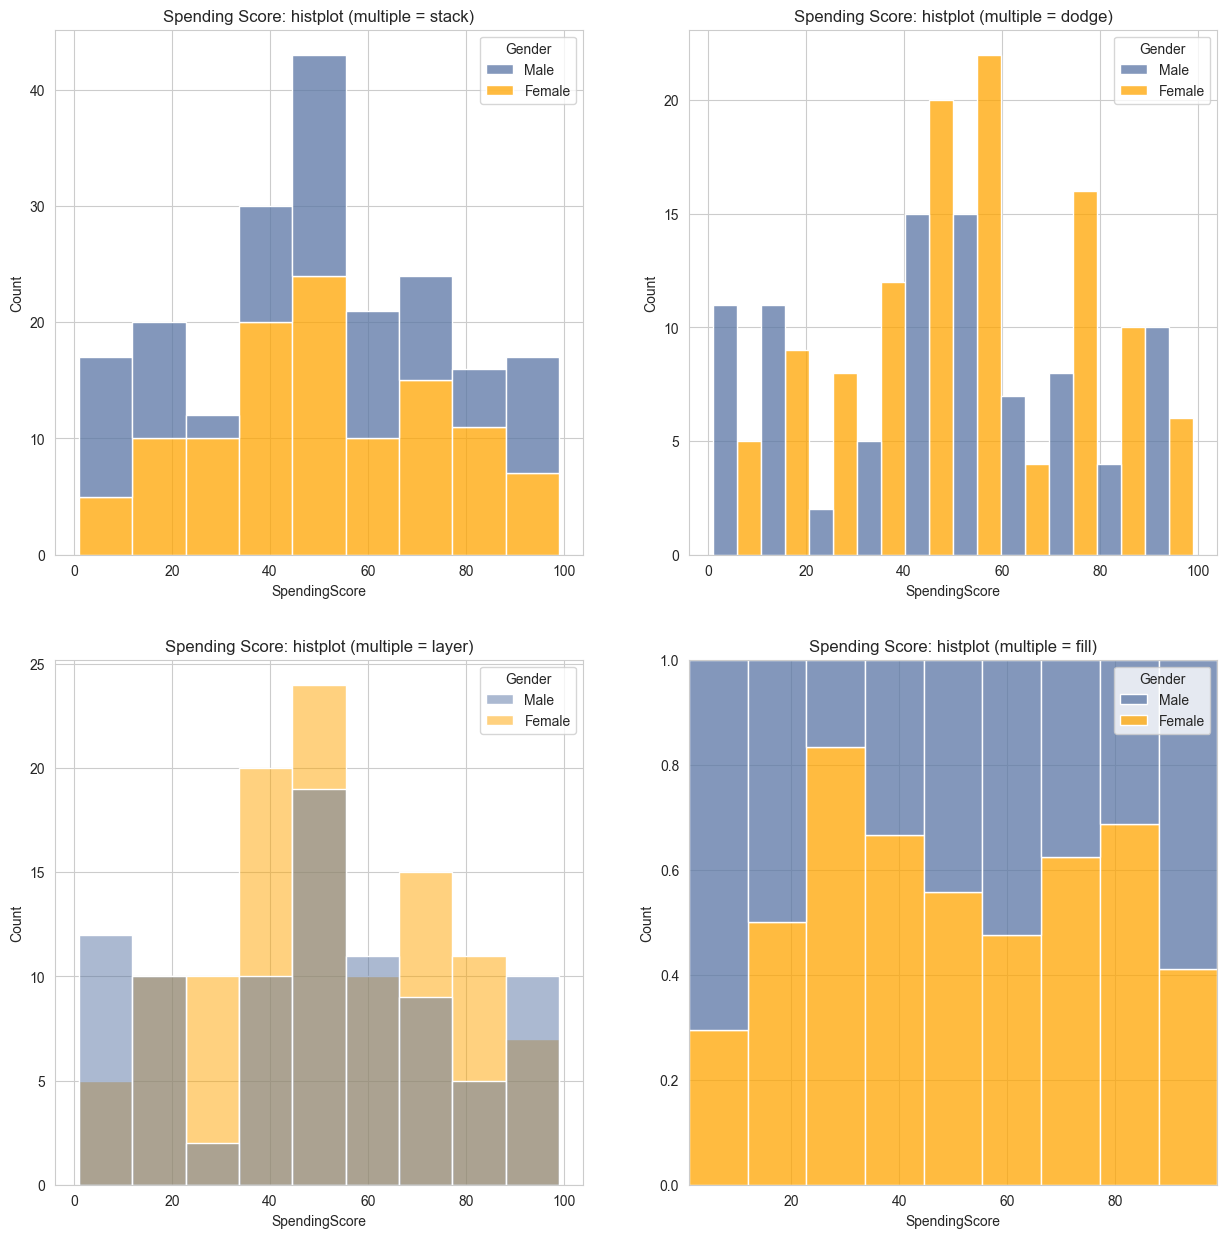

In [87]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax1, palette=['#5975A4', 'orange'], multiple="stack")
ax1.set_title("Spending Score: histplot (multiple = stack)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax2, palette=['#5975A4', 'orange'], multiple="dodge", bins=10)
ax2.set_title("Spending Score: histplot (multiple = dodge)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax3, palette=['#5975A4', 'orange'], multiple="layer")
ax3.set_title("Spending Score: histplot (multiple = layer)")

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", ax=ax4, palette=['#5975A4', 'orange'], multiple="fill")
ax4.set_title("Spending Score: histplot (multiple = fill)")

plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

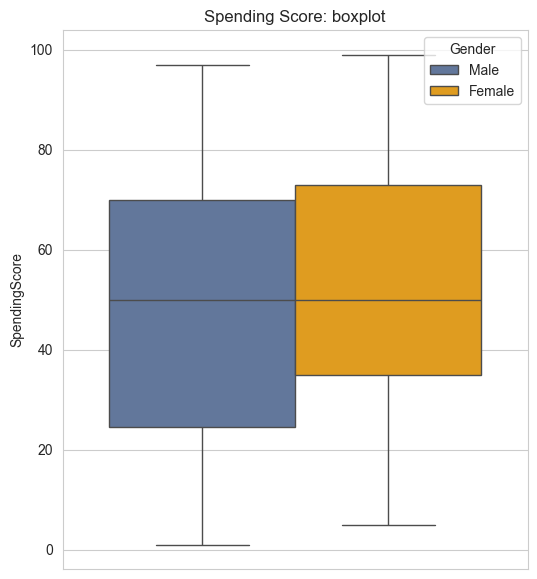

In [11]:
fig, ax1 = plt.subplots(figsize=(6, 7))

sns.boxplot(data=customer_set, y="SpendingScore", ax=ax1, palette=['#5975A4', 'orange'], hue="Gender")
ax1.set_title("Spending Score: boxplot")

plt.show()

**Висновки з завдання 5 - 8(детальні)**

1. Жінок в 1,27 разів більше за чоловіків.
2. По боксплоту видно, що жінки витрачають більше за чоловіків і мінімальний показник витрат в жінок вищий за чоловіків. Проте, медіанне значення в обох статтях однакове (50).
3. Групи витрат:
    - 0-20 - більше чоловіків
    - 20-40 - більше жінок
    - 40-60 - більше жінок
    - 60-70 - більше чоловіків
    - 70-100 - більше жінок
4. Вік: розподіл віку для жінок має декілька мод. Відповідно, для жінок найпопулярнішим віком є 20-25, 30-40 та 45-50 років. Для чоловіків - 18-25 років.
5. Річний дохід: якщо подивитись на розподіл доходу відносно жінок та чоловіків, то жінки домінують практично на усьому графіку. Проте, кількість чоловіків з доходом в 130-140 тис. більша за кількість жінок. Модою для жінок, як і для чоловіків, є дохід в 50-65 тис. та в 75-90 тис.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

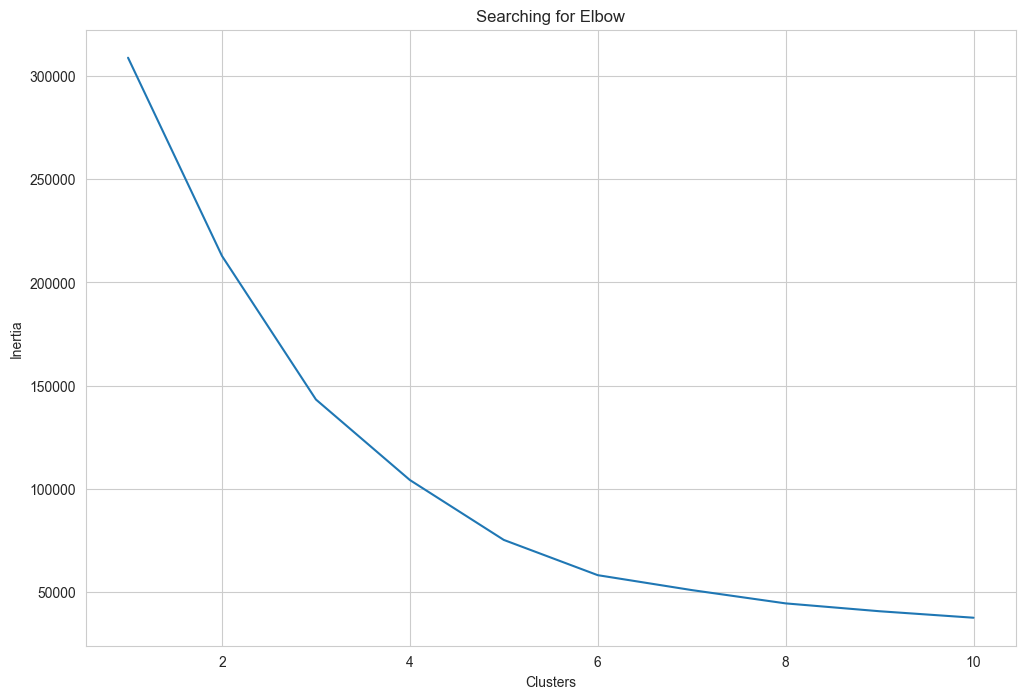

In [12]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

1. В методі `Elbow` ми задали проміжок кластеризації від 1 до 10 включно. Найбільш чітко вираженими ліктями на графіку є 3 кластери, 5 та 6. Інша кількість класів для кластерування, ймовірно, не буде доцільною.
2. По скатерплотах було видно, що для кластеризації можна використати 3 або 5 класів. Те ж саме видно і на графіку методу Elbow. Проте, я б ще використала 6 класів. 
3. Атрибут `Gender` видаляємо, бо його для кластеризації буде використовувати недоцільно, оскільки певного згрупування жінок та чоловіків на графіках нема. Також, ми вже раніше визначили, що є залежність між іншими атрибутами (доходом та витратами), тому в цьому датасеті кластеризувати за такими атрибутами буде правильніше. 

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

In [13]:
km_3 = KMeans(n_clusters=3).fit(X)
cluster_3_labels = km_3.labels_

X['Labels_3'] = cluster_3_labels

In [14]:
km_5 = KMeans(n_clusters=5).fit(X)
cluster_5_labels = km_5.labels_

X['Labels_5'] = cluster_5_labels

In [89]:
km_6 = KMeans(n_clusters=6).fit(X)
cluster_6_labels = km_6.labels_

X['Labels_6'] = cluster_6_labels

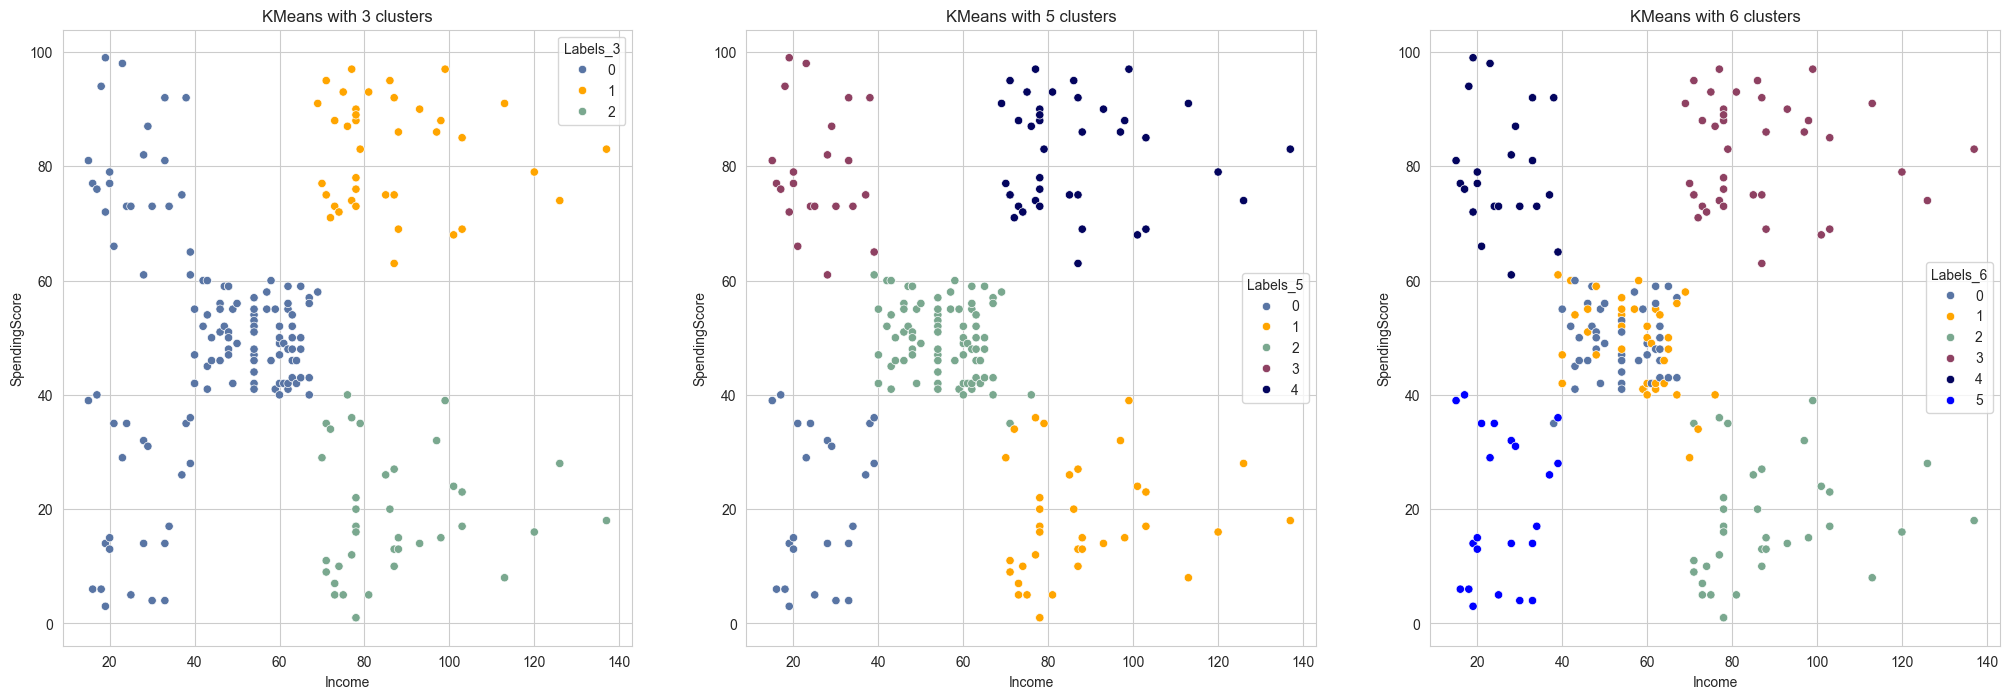

In [92]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(25, 8))

sns.scatterplot(data=X, x = 'Income', y = 'SpendingScore', hue=X['Labels_3'], palette=['#5975A4', 'orange', '#7AA88F'], ax=ax1)
ax1.set_title("KMeans with 3 clusters")

sns.scatterplot(data=X, x = 'Income', y = 'SpendingScore', hue=X['Labels_5'], palette=['#5975A4', 'orange', '#7AA88F', '#8E4162', '#03045E'], ax=ax2)
ax2.set_title("KMeans with 5 clusters")

sns.scatterplot(data=X, x = 'Income', y = 'SpendingScore', hue=X['Labels_6'], palette=['#5975A4', 'orange', '#7AA88F', '#8E4162', '#03045E', 'blue'], ax=ax3)
ax3.set_title("KMeans with 6 clusters")

plt.show()

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [17]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_3'], color_continuous_scale=['#5975A4', 'orange', '#7AA88F'])
fig.show()

In [29]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_5'], color_continuous_scale=['#5975A4', 'orange', '#7AA88F', '#8E4162', '#03045E'])
fig.show()

In [93]:
fig = px.scatter_3d(X, x='Age', y='Income', z='SpendingScore', color=X['Labels_6'], color_continuous_scale=['#5975A4', 'orange', '#7AA88F', '#8E4162', '#03045E', 'blue'])
fig.show()

**Висновки з завдання 10 - 11 (детальні)** 

На мою думку, 3 кластерів для кластерування буде недостатньо. Якщо глянути на 2d скатерплоти, то 5 кластерів виглядають найоптимальніше. Проте, на 3d візуалізації 6 кластер (який ділить центральну групу об'єктів) виглядає також доцільно. Але визначити кожну групу споживачів, розбиваючи їх на 5 класів, буде легше відносно атрибутів доходів та витрат. Тому я б використовувала саме 5 класів.

Такі групи споживачів можна виділити:
- `0 клас`: низькі витрати та дохід;
- `1 клас`: низькі витрати та високий дохід;
- `2 клас`: середні витрати та дохід;
- `3 клас`: високі витрати та низький дохід;
- `4 клас`: високі витрати та дохід.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


In [18]:
d_matrix = distance_matrix(X, X)
print(d_matrix)

[[  0.          42.15447782  33.03028913 ... 117.1836166  124.49497982
  130.22288585]
 [ 42.15447782   0.          75.07329752 ... 111.77208954 137.77517919
  122.35603786]
 [ 33.03028913  75.07329752   0.         ... 129.94229489 122.20474623
  143.82976048]
 ...
 [117.1836166  111.77208954 129.94229489 ...   0.          57.15767665
   14.35270009]
 [124.49497982 137.77517919 122.20474623 ...  57.15767665   0.
   65.10760324]
 [130.22288585 122.35603786 143.82976048 ...  14.35270009  65.10760324
    0.        ]]


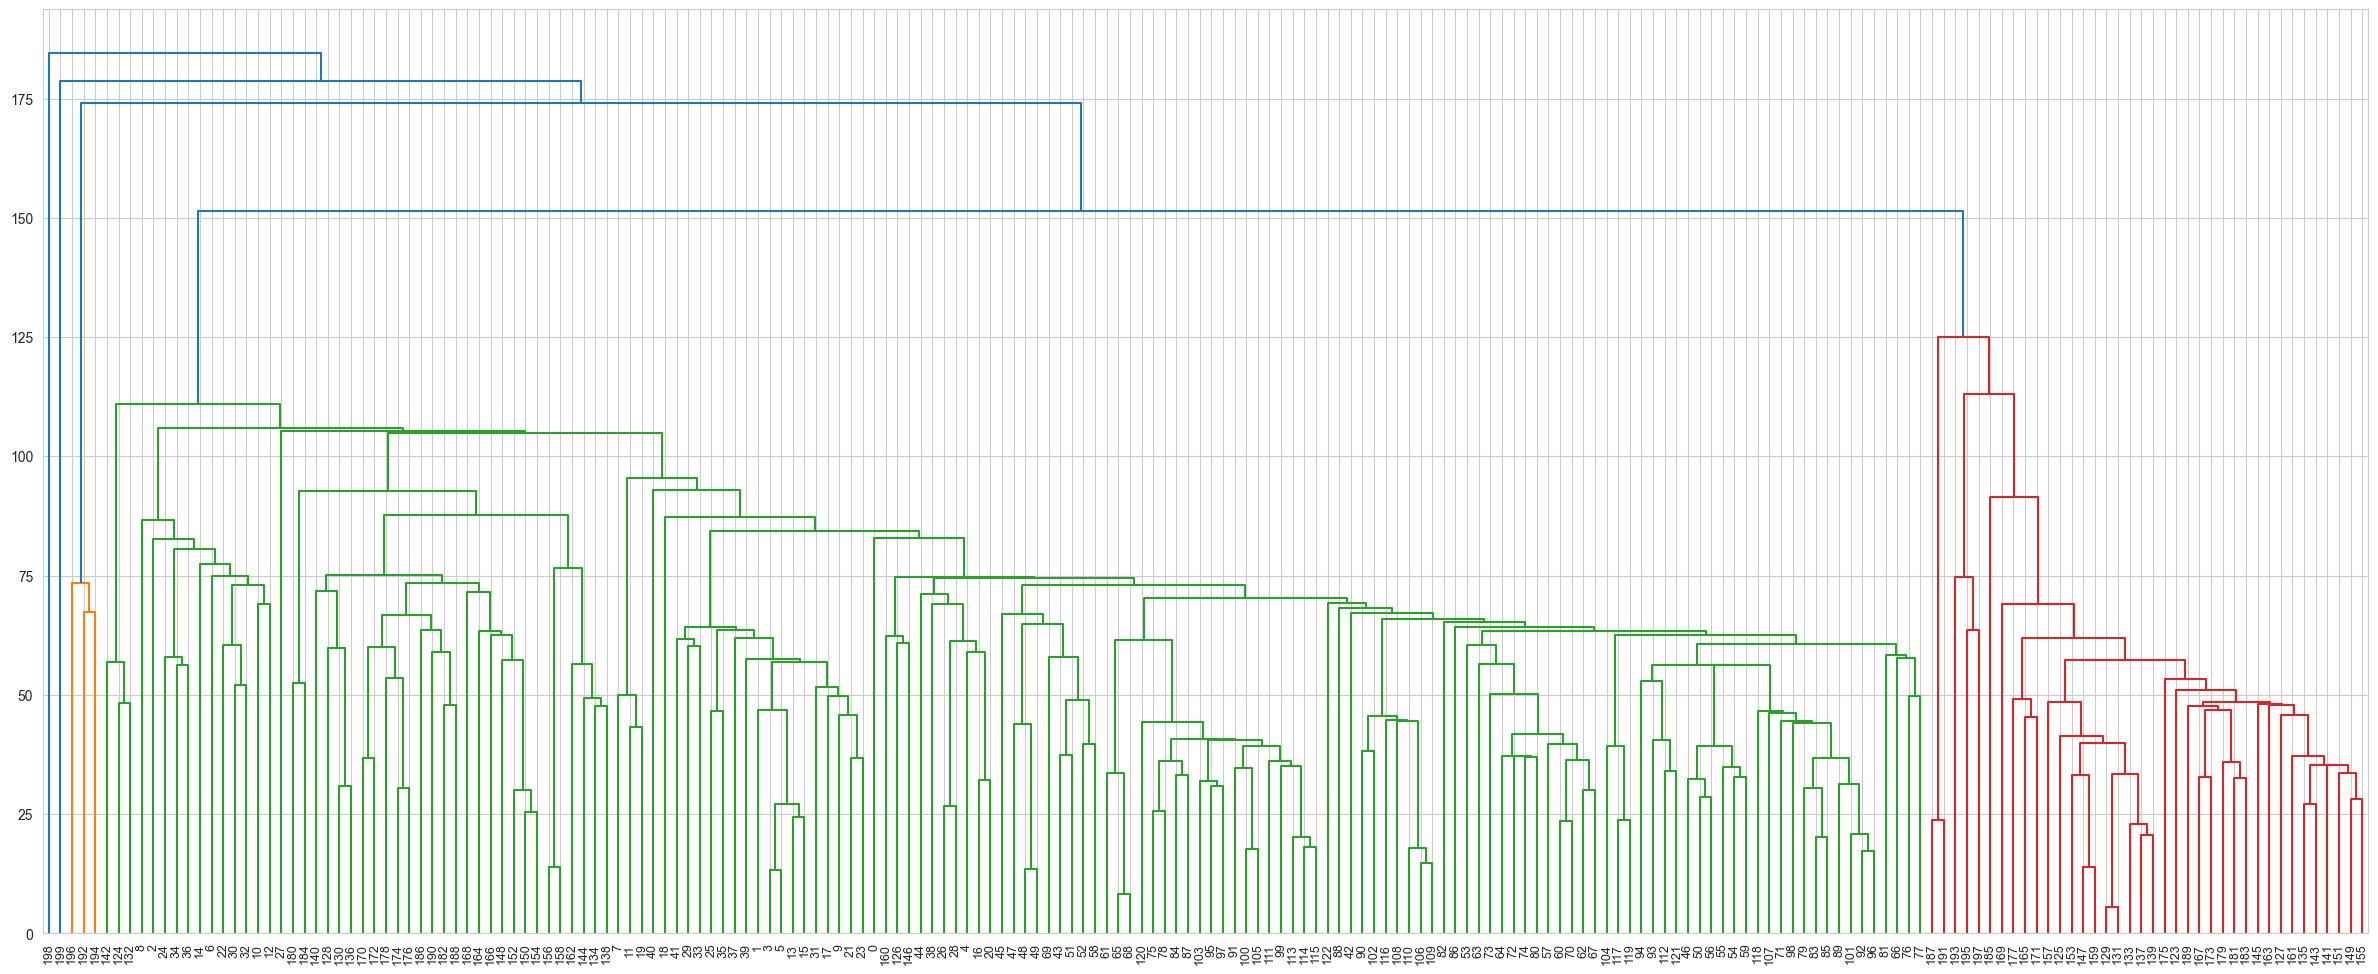

In [98]:
Z = hierarchy.linkage(d_matrix, method='single')

fig = plt.figure(figsize=(30, 12))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=9, orientation='top')

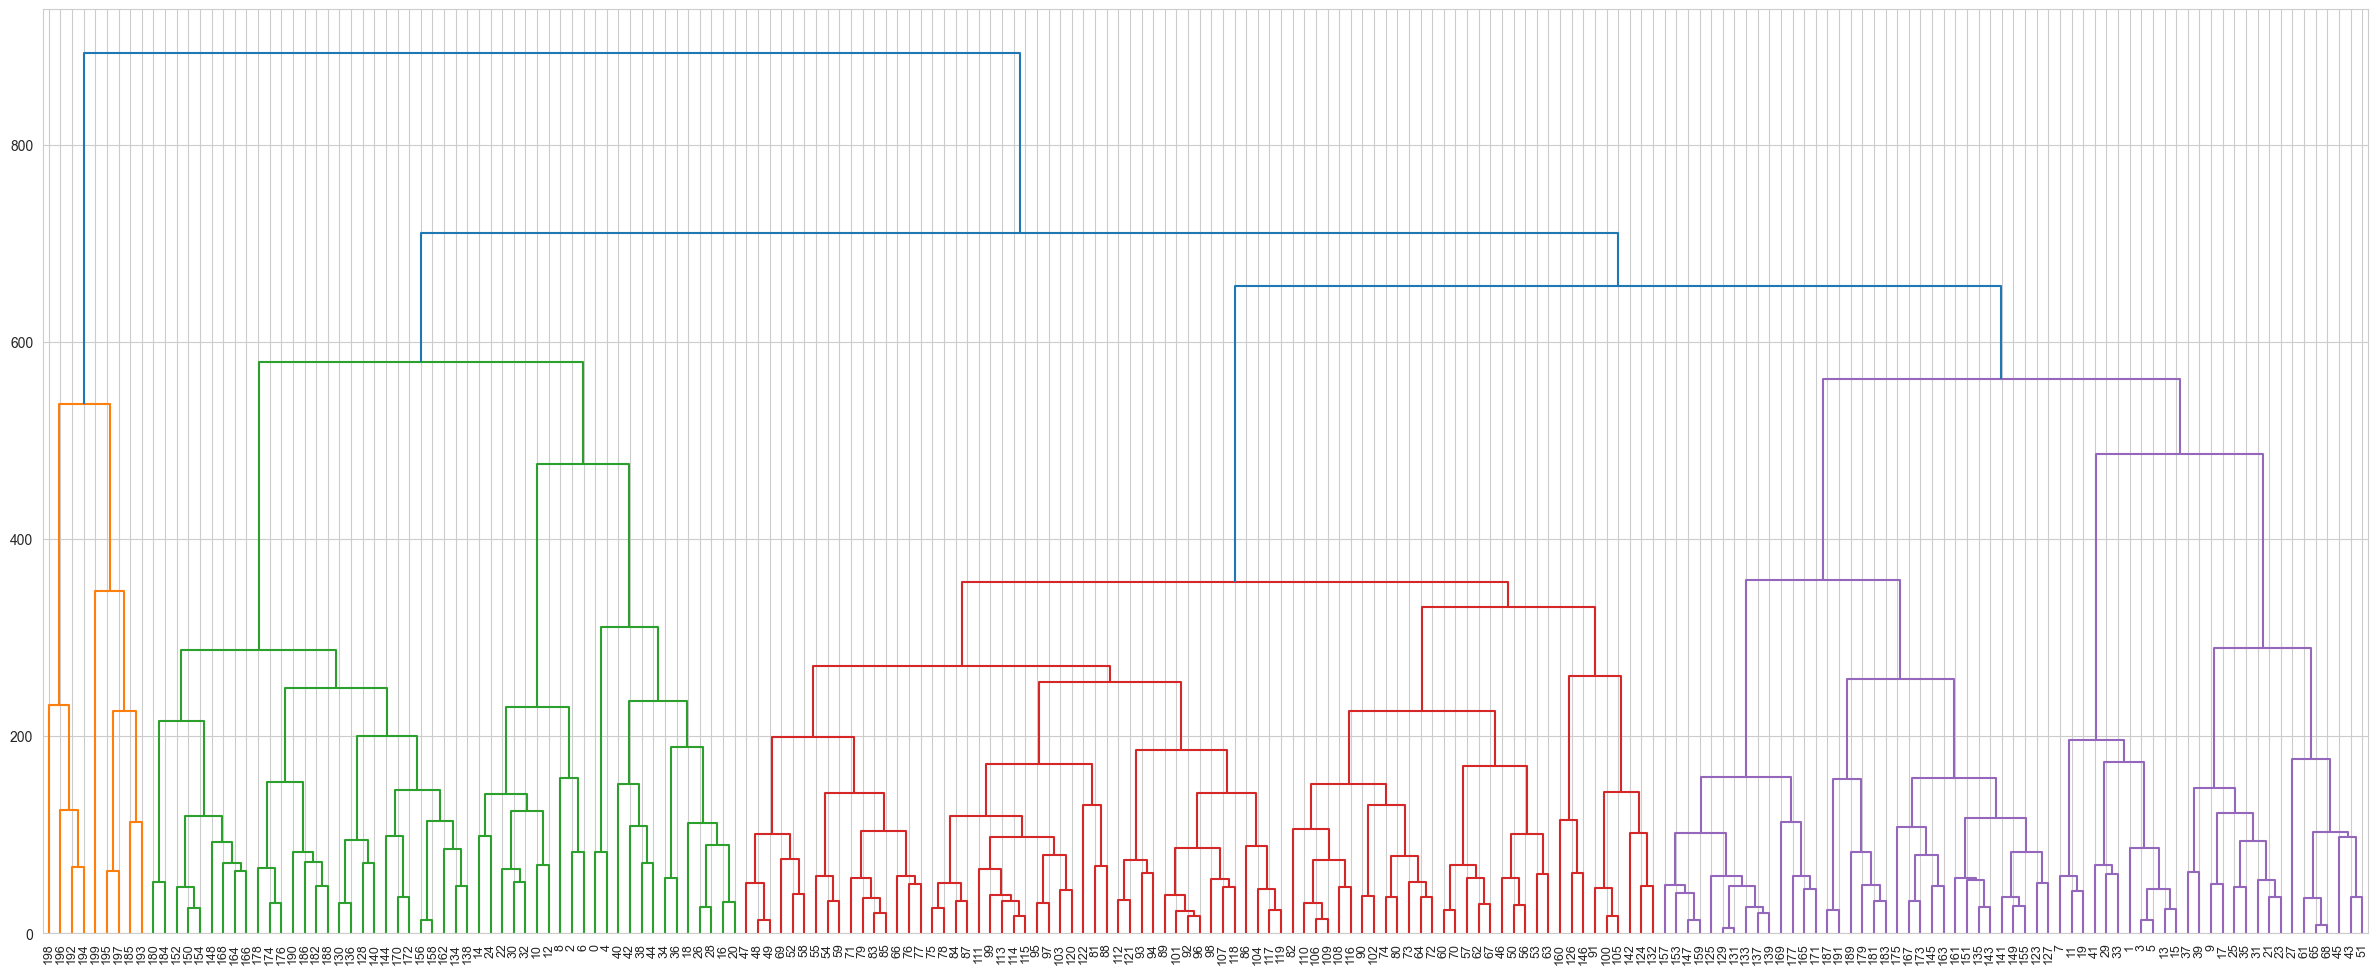

In [95]:
Z = hierarchy.linkage(d_matrix, method='complete')

fig = plt.figure(figsize=(30, 12))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=9, orientation='top')

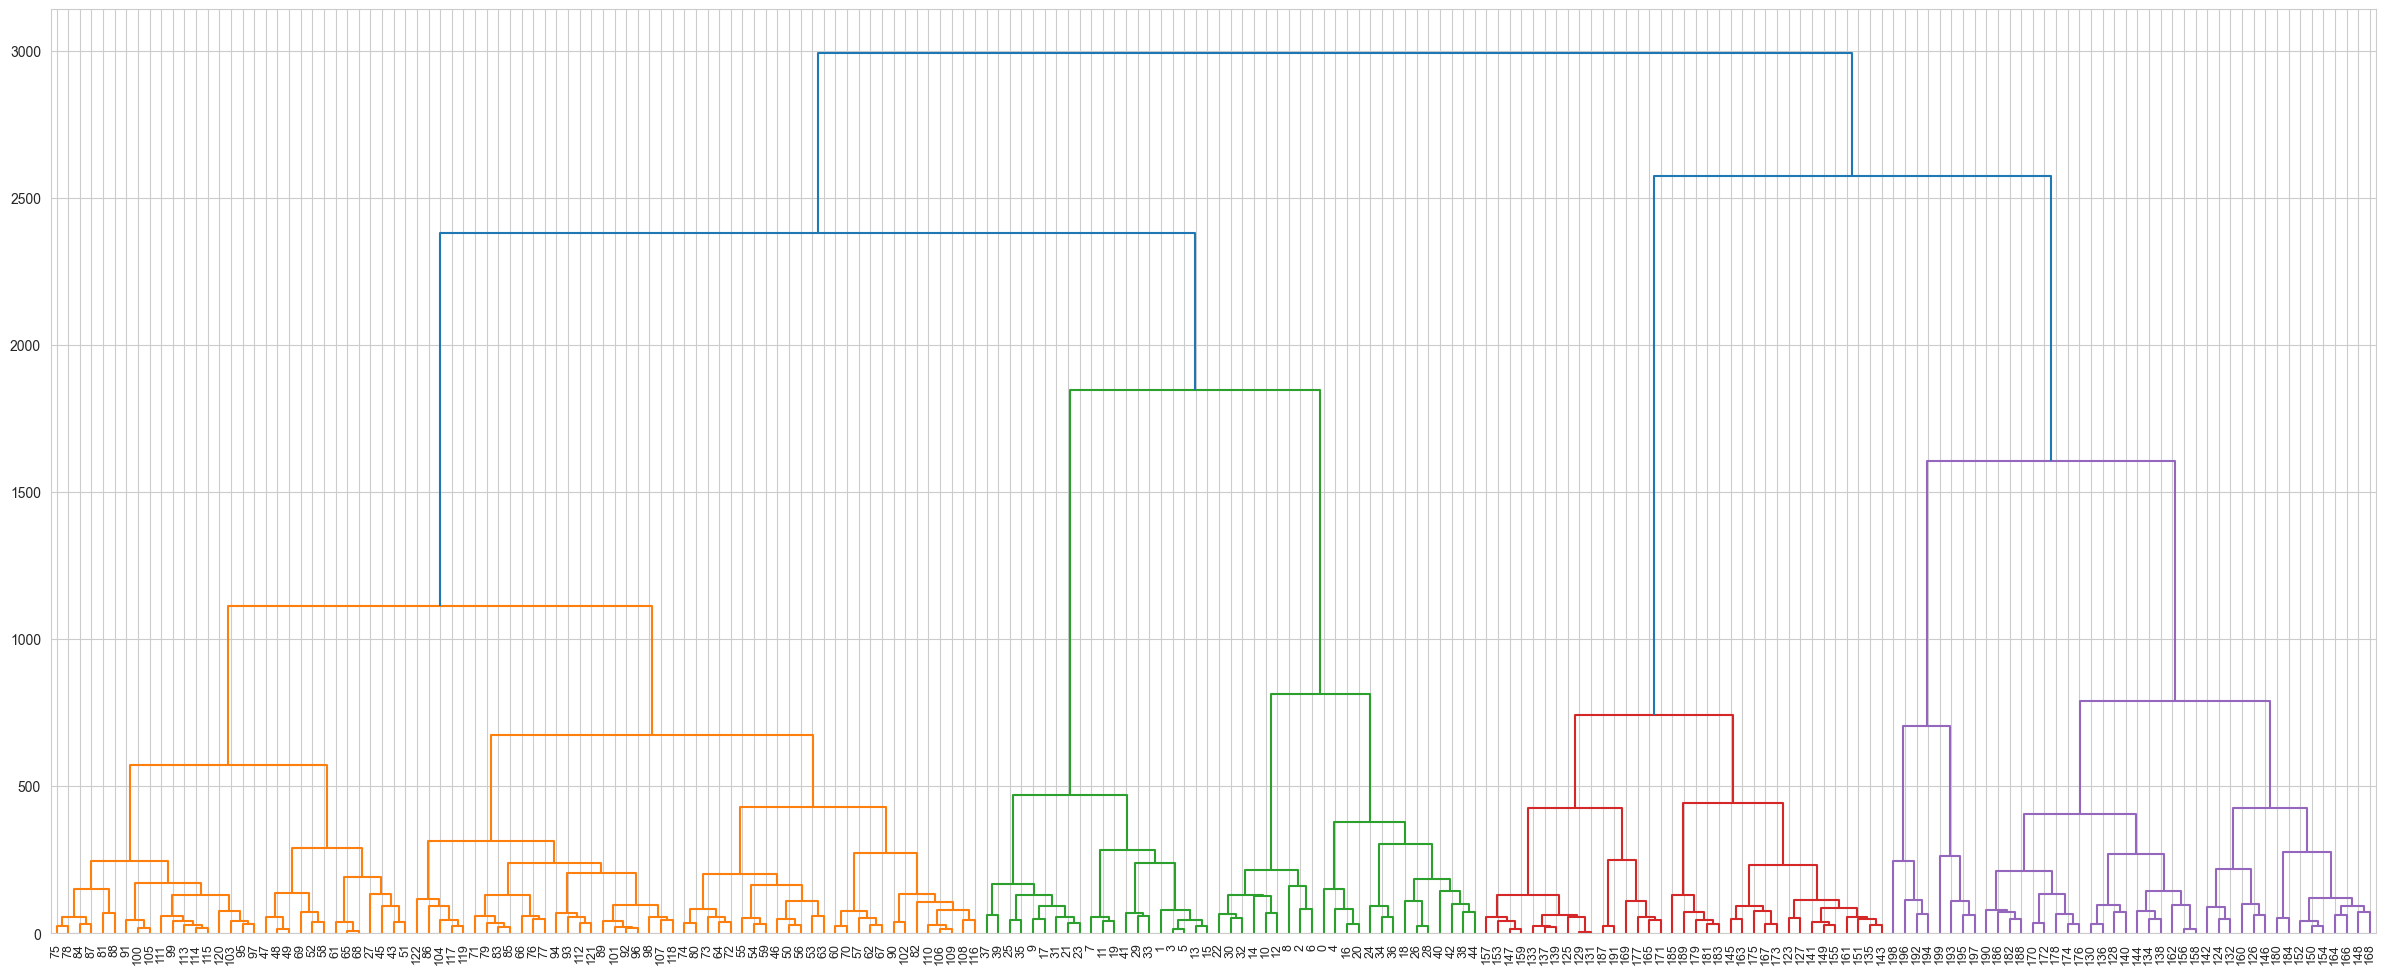

In [101]:
Z = hierarchy.linkage(d_matrix, method='ward')

fig = plt.figure(figsize=(30, 12))
dendro = hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=9, orientation='top')

**Висновки з завдання 12 (детальні)**

1. Я використала три різні значення `linkage` для кластеризації - single (метод 'найближчого сусіда'), complete (метод 'найдальшої точки') та ward (метод Варда).
2. Якщо переглянути дендрограми, то метод single розділив дані на 5 кластерів, методи complete та ward - на 4.
3. Оскільки ми хочемо розбити дані на 5 кластерів, то метод `single` нам підходить найбільше з усіх. Проте, цей метод об'єднав більшість об'єктів в один клас, а меншу частину об'єктів розділив на інші 4 класи. Таке розділення може бути не зовсім точним, що ми перевірим за допомогою додаткової візуалізації.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

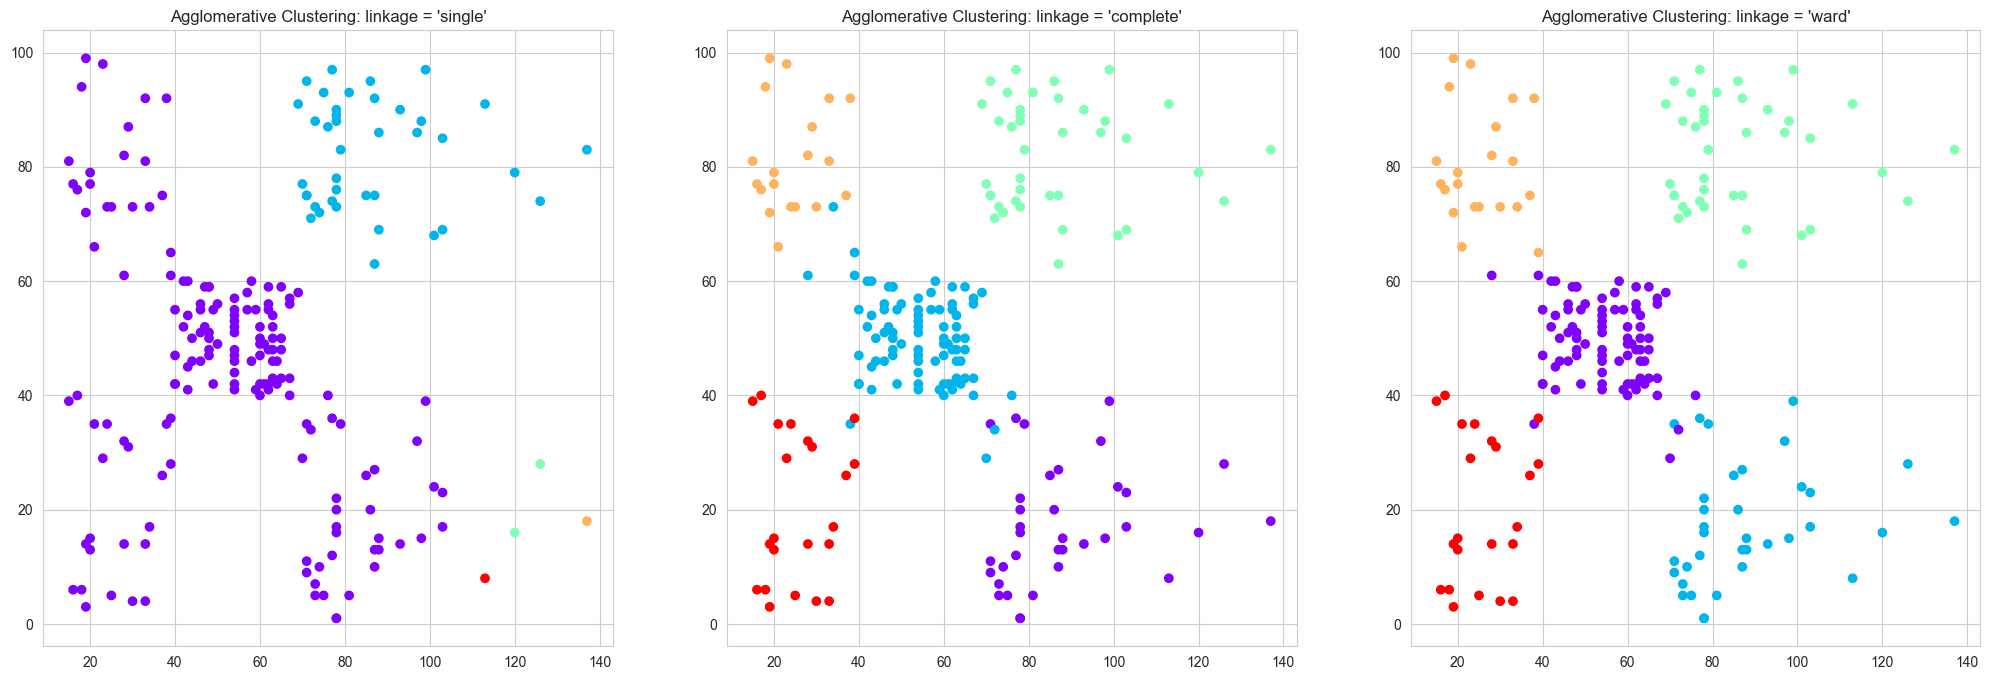

In [100]:
ac5_1 = AgglomerativeClustering(n_clusters = 5, linkage='single')
ac5_2 = AgglomerativeClustering(n_clusters = 5, linkage='complete')
ac5_3 = AgglomerativeClustering(n_clusters = 5, linkage='ward')
 
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(25, 8))

ax1.scatter(X['Income'], X['SpendingScore'], c = ac5_1.fit_predict(X), cmap='rainbow')
ax1.set_title("Agglomerative Clustering: linkage = 'single'")

ax2.scatter(X['Income'], X['SpendingScore'], c = ac5_2.fit_predict(X), cmap='rainbow')
ax2.set_title("Agglomerative Clustering: linkage = 'complete'")

ax3.scatter(X['Income'], X['SpendingScore'], c = ac5_3.fit_predict(X), cmap='rainbow')
ax3.set_title("Agglomerative Clustering: linkage = 'ward'")

plt.show()

**Висновки з завдання 13 (детальні)**

1. Метод `single`: цей метод погано розділив дані на класи, згрупувавши більшість елементів в один кластер (фіолетовий), частину елементів в інший кластер (блакитний), та по 1-2 елементи на інші три кластери (червоний, зелений та жовтий). 
2. Методи `complete` та `ward` розділили дані приблизно однаково, лише помінявши місцями кольори центрального та нижнього правого кластерів. Проте, можна помітити, що метод complete (на відміну від методу ward) до центрального кластеру додатково відправив два об'єкти з лівого верхнього класу.

Висновок: На мою думку, найкраще використовувати саме метод `ward`, бо він найчіткіше з усіх розділив дані. Також, в даному датасеті потрібно використовувати саме 5 кластерів, оскільки вони точніше розділять споживачів на групи.